# Library Reference

*   https://medium.com/@bravinwasike18/building-a-deep-learning-model-with-keras-and-resnet-50-9dd6f4eb3351
*   https://arxiv.org/pdf/1512.03385
*   https://keras.io/api/applications/resnet/



In [ ]:
pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
import math
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


# Preparing The Data

In [ ]:
import pathlib
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data)


In [ ]:
print(flowers_data)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/sunflowers/2729206569_9dd2b5a3ed.jpg


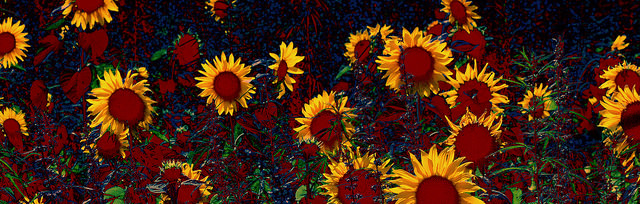

In [ ]:
all_sunflowers = list(flowers_data.glob('sunflowers/*'))
print(all_sunflowers[1])
PIL.Image.open(str(all_sunflowers[15]))


In [ ]:
height,width=180,180

training_batch_size=32

train_set = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height,width),
  batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
image_cat = train_set.class_names
print(image_cat)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Training The Model


In [ ]:
dnn_model = Sequential()

imported_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in imported_model.layers:
        layer.trainable=False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [ ]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [ ]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:

history = dnn_model.fit(
  train_set,
  validation_data=validation_set,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 445s 5s/step - loss: 0.7785 - accuracy: 0.7745 - val_loss: 0.3929 - val_accuracy: 0.8556
Epoch 2/10
92/92 [==============================] - 492s 5s/step - loss: 0.3014 - accuracy: 0.8886 - val_loss: 0.3998 - val_accuracy: 0.8501
Epoch 3/10
92/92 [==============================] - 434s 5s/step - loss: 0.1785 - accuracy: 0.9387 - val_loss: 0.3908 - val_accuracy: 0.8501
Epoch 4/10
92/92 [==============================] - 436s 5s/step - loss: 0.1110 - accuracy: 0.9615 - val_loss: 0.5266 - val_accuracy: 0.8474
Epoch 5/10
92/92 [==============================] - 436s 5s/step - loss: 0.0653 - accuracy: 0.9826 - val_loss: 0.3869 - val_accuracy: 0.8719
Epoch 6/10
92/92 [==============================] - 492s 5s/step - loss: 0.0366 - accuracy: 0.9935 - val_loss: 0.4095 - val_accuracy: 0.8787
Epoch 7/10
92/92 [==============================] - 431s 5s/step - loss: 0.0238 - accuracy: 0.9959 - val_loss: 0.4102 - val_accuracy: 0.8747
Epoch 8/10
92

# Making Predictions

In [ ]:
import cv2
sample_image=cv2.imread(str(all_sunflowers[1]))
sample_image_resized= cv2.resize(sample_image, (height, width))
sample_image=np.expand_dims(sample_image_resized,axis=0)
print(sample_image.shape)

(1, 180, 180, 3)


In [ ]:
model_pred=dnn_model.predict(sample_image)
print(model_pred)

1/1 [==============================] - 2s 2s/step
[[2.3659557e-04 4.7834084e-05 1.7645500e-04 1.7124198e-04 9.9936789e-01]]


In [ ]:
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

The predicted category is tulips


##Exercise

###1.Plot Loss between Train & Validation

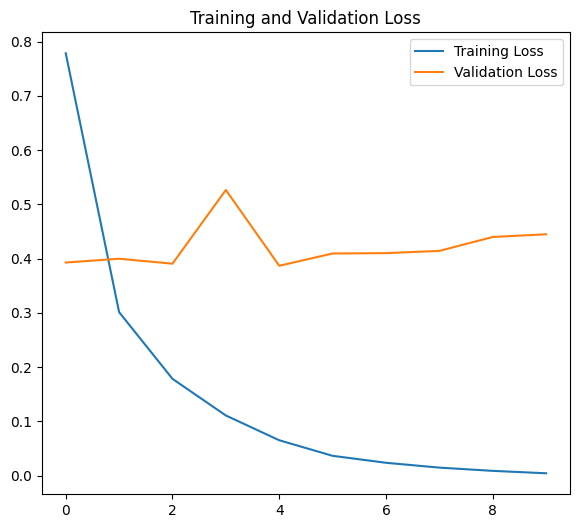

In [ ]:
train_sloss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['loss']))
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_sloss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###2.Test Dataset Result

In [ ]:
class_names = image_cat

In [ ]:
for test_images, test_labels in validation_set.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = dnn_model.predict(test_images)

1/1 [==============================] - 4s 4s/step


In [ ]:
print(predictions.shape)

(32, 5)


In [ ]:
print(predictions[0])

[1.0821209e-01 5.0447095e-05 8.5815132e-01 3.2729087e-03 3.0313168e-02]


In [ ]:
print(np.argmax(predictions[0]))

2


In [ ]:
print(test_labels[0])

2


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype("uint8"))

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ), color=color)

def plot_value_array(i, predictions_array, true_labels):
    predictions_array, true_label = predictions_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks(range(5), class_names, rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

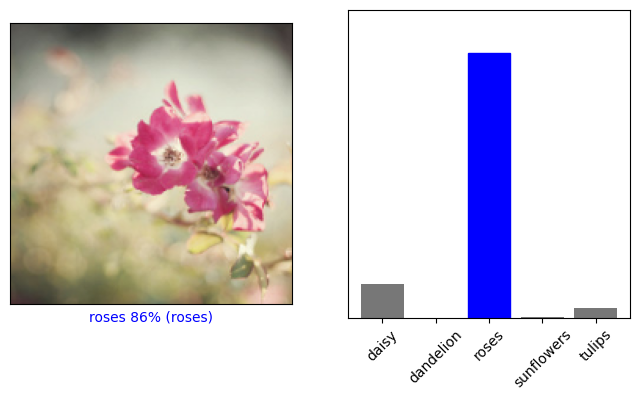

In [ ]:
i = 0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

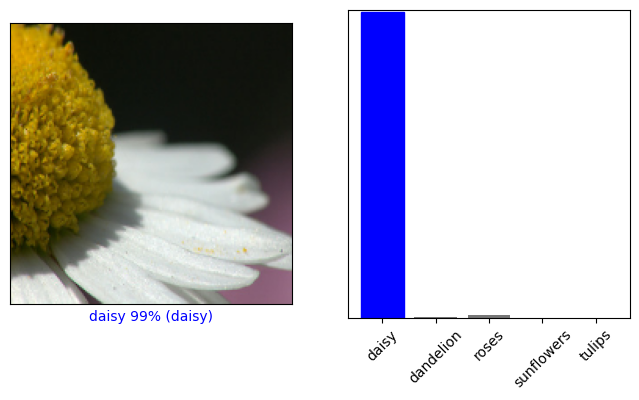

In [ ]:
i = 17
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

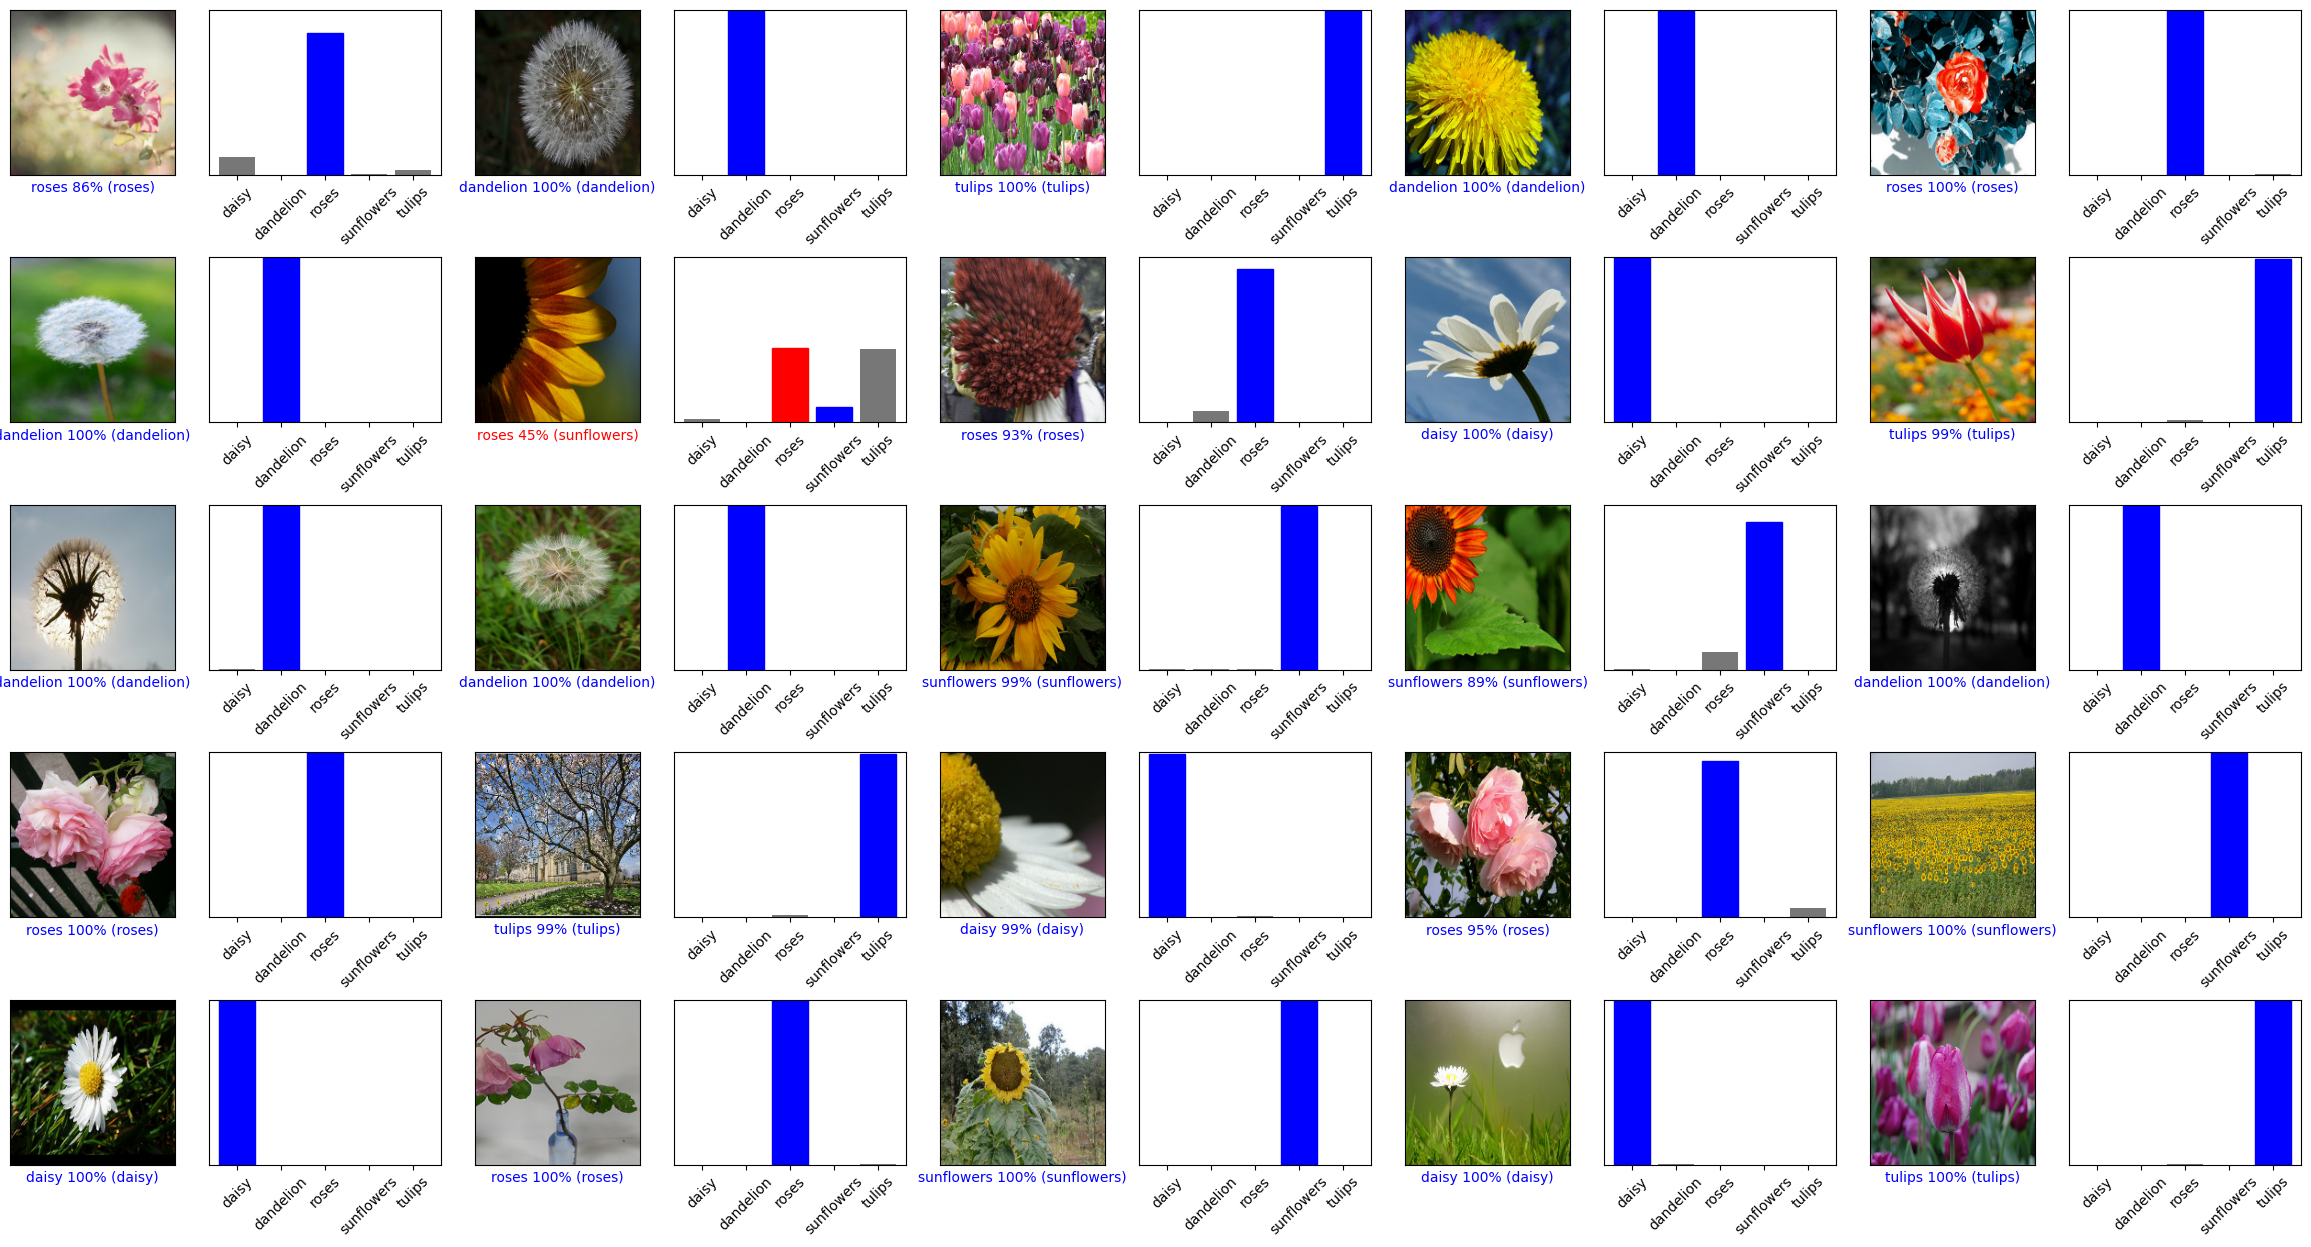

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(3*2*num_cols, 3*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

plt.subplots_adjust(hspace=0.5, wspace=0.0)


plt.show()

In [ ]:
img = test_images[0]
print(img.shape)

(180, 180, 3)


In [ ]:
img = np.array([img])
print(img.shape)

(1, 180, 180, 3)


In [ ]:
predictions_single = dnn_model.predict(img)
print(predictions_single)

1/1 [==============================] - 1s 1s/step
[[1.0821192e-01 5.0447015e-05 8.5815156e-01 3.2729034e-03 3.0313175e-02]]


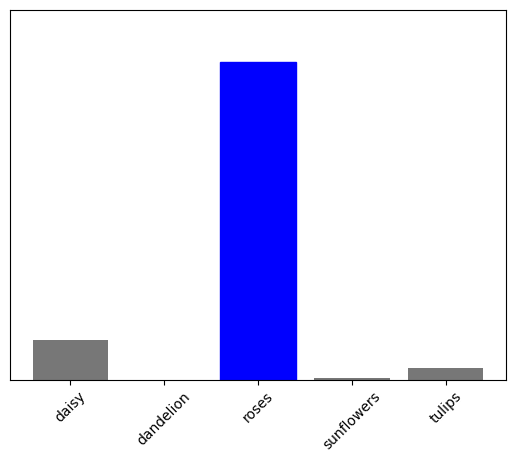

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(5), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2

###3.Fashion MNIST Dataset

#### Preparing The Data

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
print(dataset)

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


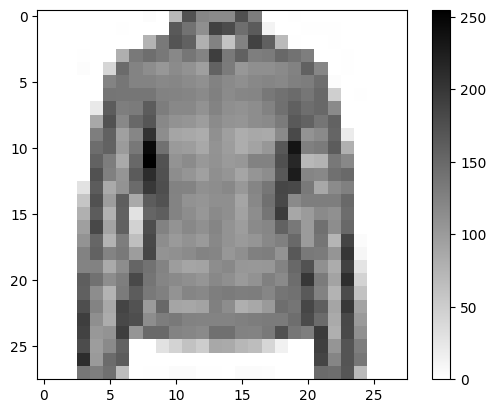

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

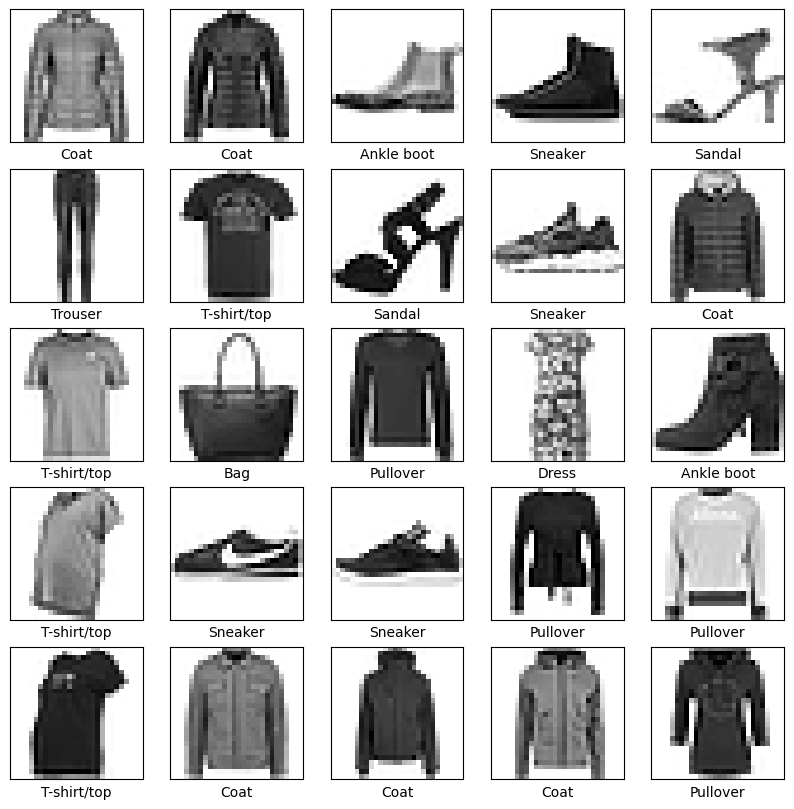

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [ ]:
def convert_types(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

batch_size = 128

train_dataset = train_dataset.map(convert_types).shuffle(10000).batch(batch_size)
test_dataset = test_dataset.map(convert_types).batch(batch_size)

#### Training The Model


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator()
datagen = ImageDataGenerator(rotation_range = 10, horizontal_flip = True, zoom_range = 0.1)

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, MaxPool2D, GlobalAveragePooling2D, Add
from tensorflow.keras import Model

class ResidualBlock(Model):
    def __init__(self, channel_in = 64, channel_out = 256):
        super().__init__()

        channel = channel_out // 4

        self.conv1 = Conv2D(channel, kernel_size = (1, 1), padding = "same")
        self.bn1 = BatchNormalization()
        self.av1 = Activation(tf.nn.relu)
        self.conv2 = Conv2D(channel, kernel_size = (3, 3), padding = "same")
        self.bn2 = BatchNormalization()
        self.av2 = Activation(tf.nn.relu)
        self.conv3 = Conv2D(channel_out, kernel_size = (1, 1), padding = "same")
        self.bn3 = BatchNormalization()
        self.shortcut = self._shortcut(channel_in, channel_out)
        self.add = Add()
        self.av3 = Activation(tf.nn.relu)

    def call(self, x):
        h = self.conv1(x)
        h = self.bn1(h)
        h = self.av1(h)
        h = self.conv2(h)
        h = self.bn2(h)
        h = self.av2(h)
        h = self.conv3(h)
        h = self.bn3(h)
        shortcut = self.shortcut(x)
        h = self.add([h, shortcut])
        y = self.av3(h)
        return y

    def _shortcut(self, channel_in, channel_out):
        if channel_in == channel_out:
            return lambda x : x
        else:
            return self._projection(channel_out)

    def _projection(self, channel_out):
        return Conv2D(channel_out, kernel_size = (1, 1), padding = "same")

class ResNet50(Model):
    def __init__(self, input_shape, output_dim):
        super().__init__()

        self._layers = [
            # conv1
            Conv2D(64, input_shape = input_shape, kernel_size = (7, 7), strides=(2, 2), padding = "same"),
            BatchNormalization(),
            Activation(tf.nn.relu),
            # conv2_x
            MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same"),
            ResidualBlock(64, 256),
            [
                ResidualBlock(256, 256) for _ in range(2)
            ],
            # conv3_x
            Conv2D(512, kernel_size = (1, 1), strides=(2, 2)),
            [
                ResidualBlock(512, 512) for _ in range(4)
            ],
            GlobalAveragePooling2D(),
            Dense(128, activation = tf.nn.relu),
            Dense(10, activation = tf.nn.softmax)
        ]

    def call(self, x):
        for layer in self._layers:
            if isinstance(layer, list):
                for l in layer:
                    x = l(x)
            else:
                x = layer(x)
        return x


model = ResNet50((28, 28, 1), 10)
model.build(input_shape = (None, 28, 28, 1))
model.summary()

Model: "res_net50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  3200      
                                                                 
 batch_normalization (Batch  multiple                  256       
 Normalization)                                                  
                                                                 
 activation (Activation)     multiple                  0         
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 residual_block (ResidualBl  multiple                  75904     
 ock)                                                            
                                                         

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

In [ ]:
@tf.function
def train_step(image, label):
    with tf.GradientTape() as tape:
        predictions = model(image)
        loss = loss_object(label, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(label, predictions)

@tf.function
def test_step(image, label):
    predictions = model(image)
    loss = loss_object(label, predictions)

    test_loss(loss)
    test_accuracy(label, predictions)


In [ ]:
num_epoch = 10

#Lists to store loss
train_losses = []
test_losses = []

for epoch in range(num_epoch):
    for image, label in dataset_train:
        for _image, _label in datagen.flow(image, label, batch_size=batch_size):
            train_step(_image, _label)
            break

    for test_image, test_label in dataset_test:
        test_step(test_image, test_label)

#Save the results for plotting
    train_losses.append(train_loss.result())
    test_losses.append(test_loss.result())

    template = 'Epoch {}, Loss: {:.4f}, Test Loss: {:.4f}'
    print(template.format(epoch + 1, train_loss.result(), test_loss.result()))

Epoch 1, Loss: 0.6327, Test Loss: 0.4538
Epoch 2, Loss: 0.5605, Test Loss: 0.4142
Epoch 3, Loss: 0.5174, Test Loss: 0.4041
Epoch 4, Loss: 0.4876, Test Loss: 0.3894
Epoch 5, Loss: 0.4649, Test Loss: 0.3784
Epoch 6, Loss: 0.4473, Test Loss: 0.3723
Epoch 7, Loss: 0.4323, Test Loss: 0.3631
Epoch 8, Loss: 0.4196, Test Loss: 0.3568
Epoch 9, Loss: 0.4088, Test Loss: 0.3541
Epoch 10, Loss: 0.3992, Test Loss: 0.3492


#### Making Predictions

In [ ]:
model_pred=model.predict(dataset_test)
print(model_pred)

313/313 [==============================] - 16s 51ms/step
[[8.40039429e-05 1.46594903e-06 4.77844886e-02 ... 1.14425405e-11
  9.42777260e-05 6.86868784e-09]
 [1.87336191e-04 1.47369940e-06 4.18877713e-02 ... 1.06215113e-12
  1.19656077e-04 1.10424503e-09]
 [2.72332841e-07 6.20395610e-08 4.74646722e-09 ... 1.21665299e-02
  5.12788620e-06 9.84546781e-01]
 ...
 [1.92131530e-02 9.96247120e-03 1.66376337e-01 ... 1.07826600e-05
  1.21487854e-02 2.58849235e-04]
 [6.36028417e-04 1.39309104e-05 2.12129593e-01 ... 6.98325980e-11
  3.07634269e-04 4.80626952e-08]
 [8.99482977e-09 9.99999225e-01 5.55507818e-09 ... 1.62271760e-17
  1.34819611e-09 2.04805011e-14]]


In [ ]:
predicted_index = np.argmax(prediction)
predicted_class = class_names[predicted_index]
print("The predicted category is", predicted_class)

The predicted category is Trouser


####Plot Loss between Train & Validation

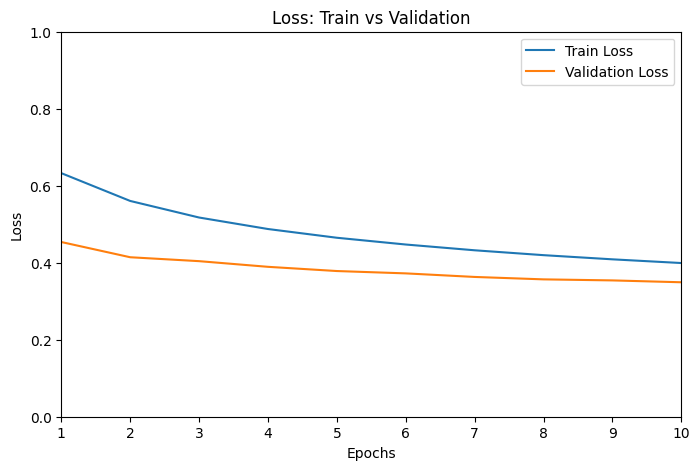

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epoch + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epoch + 1), test_losses, label='Validation Loss')
plt.title('Loss: Train vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1, num_epoch)
plt.ylim(0, 1.0)
plt.legend()
plt.show()

####Test Dataset Result

In [ ]:
for test_images, test_labels in dataset_test.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 1s 540ms/step


In [ ]:
predictions.shape


(32, 10)

In [ ]:
predictions[0]

array([8.40039429e-05, 1.46594903e-06, 4.77844886e-02, 2.28005065e-05,
       8.29190850e-01, 5.97460081e-09, 1.22822024e-01, 1.14425405e-11,
       9.42777260e-05, 6.86868784e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

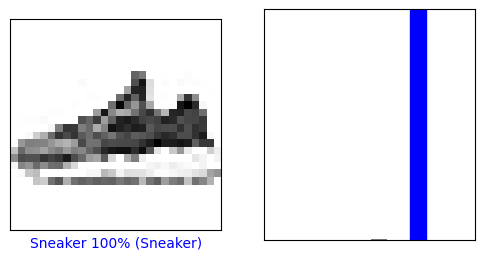

In [ ]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

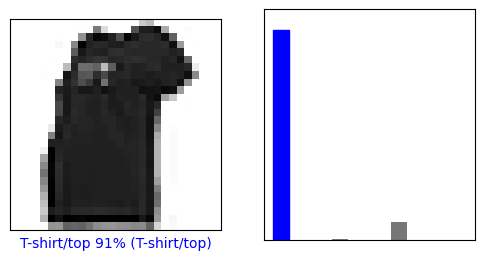

In [ ]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

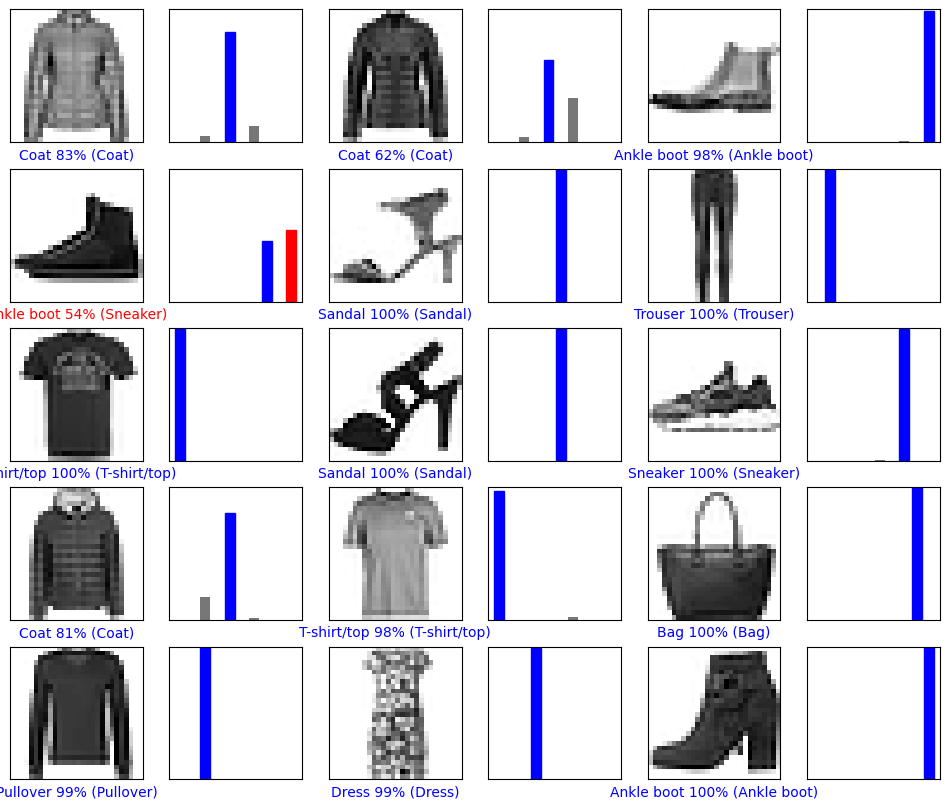

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [ ]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 1s 687ms/step
[[8.4003797e-05 1.4659464e-06 4.7784474e-02 2.2800488e-05 8.2919097e-01
  5.9745902e-09 1.2282193e-01 1.1442520e-11 9.4277653e-05 6.8686759e-09]]


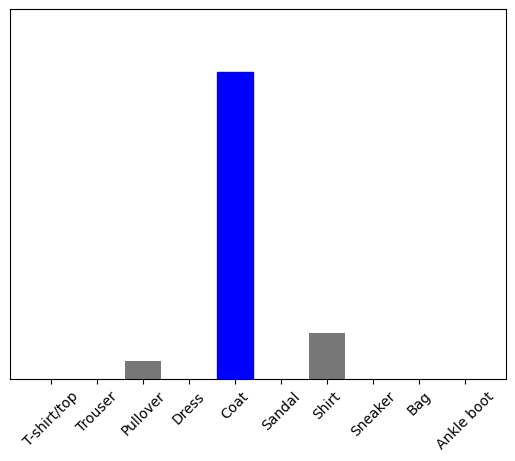

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4